In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [3]:
category_df = df.select_dtypes(include=['object']).copy()
category_df.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [4]:
category_df.isna().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(category_df[['tailnum']])
category_df[['tailnum']] = imputer.transform(category_df[['tailnum']])
category_df.isna().sum()

carrier    0
tailnum    0
origin     0
dest       0
dtype: int64

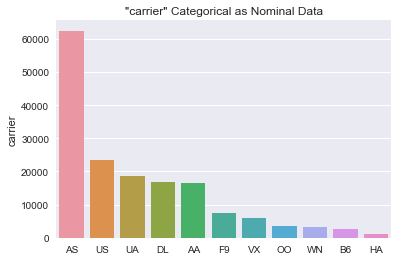

In [6]:
sns.barplot(category_df.carrier.unique() ,category_df.carrier.value_counts())
plt.title('"carrier" Categorical as Nominal Data')
plt.show()

---
<h1>Handling Categorical Data</h1>
<p>
    There are 2 types of categorical data<ul>
        <li><strong>Nominal Data</strong><ul>
            <li>This is a type of data used to name variables without providing any numerical value
            <li>Nominal data is sometimes called “labelled” or “named” data
            <li>Examples : name, hair colour, sex etc
        </ul>
        <li><strong>Ordinal Data</strong><ul>
            <li>This is a data type with a set order or scale to it
            <li>However, this order does not have a standard scale on which the difference in variables in each scale is measured
        </ul>
    </ul>
</p>

<h2>1. Replacing values</h2>
<ul>
    <li>Defining a mapping via a hard coded dictionary is easy when the number of categories is low
    <li>dictionary comprehensions will be useful when the categories count is high and we don't want to type out each mapping
    <li>in Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype
</ul>

In [7]:
# Create label maps
labels = category_df.carrier.unique().tolist()
labels.sort()
map_carr = { 'carrier' : { k: v for k,v in zip(labels, range(1, len(labels)+1)) } }
print(map_carr)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [8]:
df_test = category_df.copy()
df_test.replace(map_carr, inplace=True)
df_test.carrier = df_test.carrier.astype('category')
df_test.head()

,carrier,tailnum,origin,dest
0,2,N508AS,PDX,ANC
1,9,N195UW,SEA,CLT
2,8,N37422,PDX,IAH
3,9,N547UW,PDX,CLT
4,2,N762AS,SEA,ANC


---
<h2>2. Encoding labels</h2>
<ul>
    <li>Label Encoding allows us to convert each value in a column to a number
    <li>Numerical labels are always between 0 and n_categories-1
    <li>It has as disadvantage that the numerical values can be misinterpreted by the algorithm (if the data is nominal not ordinal)
</ul>

In [9]:
from sklearn.preprocessing import LabelEncoder

df_test = category_df.copy()
le = LabelEncoder()
df_test.carrier = le.fit_transform(df_test.carrier)
df_test.head()

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


---
<h2>3. One-Hot Encoding</h2>
<ul>
    <li>The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column
    <li>This has the benefit of not weighting a value improperly
    <li>scikit-learn supports one hot encoding via LabelBinarizer and OneHotEncoder
    <li><strong>While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns, which can result in the curse of dimensionality<strong>
</ul>

In [10]:
from sklearn.preprocessing import LabelBinarizer

df_test = category_df.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_test.carrier)
lb_df = pd.DataFrame(lb_results, columns=lb.classes_)
df_test = df_test.join(lb_df)
df_test.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
1,US,N195UW,SEA,CLT,0,0,0,0,0,0,0,0,1,0,0
2,UA,N37422,PDX,IAH,0,0,0,0,0,0,0,1,0,0,0
3,US,N547UW,PDX,CLT,0,0,0,0,0,0,0,0,1,0,0
4,AS,N762AS,SEA,ANC,0,1,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import OneHotEncoder

df_test = category_df.copy()
ohe = OneHotEncoder()
ohe_results = ohe.fit(df_test[['carrier']])
ohe_df = pd.DataFrame(ohe_results.transform(df_test[['carrier']]).toarray(), columns=ohe_results.categories_)
ohe_df.columns = [c[0] for c in ohe_df.columns] # Remove MultiIndex columns
df_test = df_test.join(ohe_df)
df_test.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,AS,N508AS,PDX,ANC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,US,N195UW,SEA,CLT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,UA,N37422,PDX,IAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,US,N547UW,PDX,CLT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AS,N762AS,SEA,ANC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
<h2>4. Binary encoding</h2>
<ul>
    <li>This technique is not as intuitive as the previous techniques
    <li>In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns
    <li>This encodes the data in fewer dimensions than one-hot
</ul>

In [12]:
import category_encoders

df_test = category_df.copy()
ce = category_encoders.BinaryEncoder(cols=['carrier'])
df_test = ce.fit_transform(df_test)
df_test.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N508AS,PDX,ANC
1,0,0,0,1,0,N195UW,SEA,CLT
2,0,0,0,1,1,N37422,PDX,IAH
3,0,0,0,1,0,N547UW,PDX,CLT
4,0,0,0,0,1,N762AS,SEA,ANC


---
<h2>5. Backward difference encoding</h2>
<ul>
    <li>This technique falls under the contrast coding system for categorical features
    <li>In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level
    <li>This type of coding may be useful for a nominal or an ordinal variable
</ul>

In [13]:
import category_encoders

df_test = category_df.copy()
ce = category_encoders.BackwardDifferenceEncoder(cols=['carrier'])
df_test = ce.fit_transform(df_test)
df_test.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N508AS,PDX,ANC
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N195UW,SEA,CLT
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N37422,PDX,IAH
3,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N547UW,PDX,CLT
4,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N762AS,SEA,ANC


---
<h2>6. Target encoding</h2>
<ul>
    <li>A lesser known, but very effective way of handling categorical variables, is Target Encoding
    <li>It consists of substituting each group in a categorical feature with the average response in the target variable
    <li>Target encoding replaces each category with the average value of the target for rows with that category, similar to Naive Bayes
    <li>Target Encoding is a powerful solution also because it avoids generating a high number of features, as is the case for One-Hot Encoding, keeping the dimensionality of the dataset as the original one
    <li>Because these encoders use the target value, we have to be careful when doing cross-validation to encode during each step of cross-validation, rather than just encode
</ul>

In [14]:
import category_encoders

df_test = category_df.copy()
df_test.origin = df_test.origin.apply(lambda x : 0 if x == 'PDX' else 1)
ce = category_encoders.TargetEncoder(cols=['carrier'], smoothing=0)
df_test = ce.fit_transform(df_test, df_test.origin) # Assume that origin column is our target
print(df_test.head())

carrier tailnum  origin dest
0  0.794364  N508AS       0  ANC
1  0.602926  N195UW       1  CLT
2  0.636435  N37422       0  IAH
3  0.602926  N547UW       0  CLT
4  0.794364  N762AS       1  ANC


---
<h2>Small notes about Category Encoders</h2>
<ol>
    <li><h3>Classic Encoders</h3>The first classic encoders can be seen on a continuum of embedding information in one column (Ordinal) up to k columns (OneHot)<ul>
        <li>Ordinal — convert string labels to integer values 1 through k (ordinal)
        <li>OneHot — one column for each value to compare vs. all other values (nominal, ordinal)
        <li>Binary  — convert each integer to binary digits and each binary digit gets one column (ordinal)
        <li>BaseN — Doesn’t add much functionality. Probably avoid
        <li>Hashing — Like OneHot but fewer dimensions, some info loss due to collisions (nominal, ordinal)
        <li>Sum — Just like OneHot except one value is held constant and encoded as -1 across all columns (nominal, ordinal)
    </ul>
    <li><h3>Contrast Encoders</h3>The contrast encoders all have multiple issues make them unlikely to be useful for machine learning, they all output one column for each value found in a column<ul>
        <li>Helmert
        <li>BackwardDifference
        <li>Polynomial
    </ul>
    <li><h3>Bayesian Encoders</h3>The Bayesian encoders use information from the dependent variable in their encodings, they output one column and can work well with high cardinality data<ul>
        <li>Target — use the mean of the DV, must take steps to avoid overfitting/ response leakage (nominal, ordinal) (<strong>For classification tasks</strong>)
        <li>LeaveOneOut — similar to target but avoids contamination (nominal, ordinal) (<strong>For classification tasks</strong>)
        <li>M-Estimator — Simplified target encoder (nominal, ordinal) (<strong>For classification tasks</strong>)
    </ul>
</ol><br>
<h4>
    <ul>
        <li>For nominal columns try OneHot, Hashing, LeaveOneOut, and Target encoding
        <li>Avoid OneHot for high cardinality columns and decision tree-based algorithms
        <li>For ordinal columns try Ordinal (Integer), Binary, OneHot, LeaveOneOut, and Target
        <li>Helmert, Sum, BackwardDifference and Polynomial are less likely to be helpful, but if we have time or theoretic reason we might want to try them
        <li>For regression tasks, Target and LeaveOneOut probably won’t work well
    </ul>
</h4><br><br><br>
Terminology:<ul>
    <li><i>k</i> — the original number of unique values in your data column
    <li><i>High cardinality</i> — a lot of unique values (a large k)
    <li><i>High dimensionality</i> — a matrix with many dimensions and comes with the Curse of Dimensionality, the take away is that high dimensionality requires many observations and often results in overfitting
    <li><i>Sparse</i> — a matrix with lots of zeroes relative to other values
</ul>